**Instructions:**

- For questions that require coding, you need to write the relevant code and display its output. Your output should either be the direct answer to the question or clearly display the answer in it.
- For questions that require a written answer (sometimes along with the code), you need to put your answer in a Markdown cell. Writing the answer as a comment or as a print line is not acceptable.
- You need to render this file as HTML using Quarto and submit the HTML file. **Please note that this is a requirement and not optional.** A submission cannot be graded until it is properly rendered.

Import all the libraries and tools you need below.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

## 1)

Copy the `initialize`, `predict` and `calc_cost_gradient` functions you wrote in the two previous assignments here. **(1 point)**

In [51]:
# Initialize function
def initialize(dim):
    # Create the vector of random numbers v, from uniform dist
    v = np.random.rand(dim + 1)
    return v

# Predict function
def predict(model_params, X_test):
    # Add 1 to toy_data
    toy_data_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]
    # Apply dot product to calculate the prediction
    prediction = np.dot(toy_data_with_intercept, model_params)
    return prediction

# calc_cost_gradient function
def calc_cost_gradient(model_params, X_train, y_train):
    # Predict the y value generated through model parameters (y hat)
    y_train_prediction = predict(model_params, X_train)
    # Force y_train to numpy array
    y_train = np.array(y_train)
    # Calculate the mean square error
    mse_cost_array =((y_train - y_train_prediction) ** 2)/np.size(y_train)
    # Sum the error created by each observation
    mse_cost = sum(mse_cost_array)
    # Next, calculate the gradient
    # Add 1 to X_train
    X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]
    # Calculate gradient based on in-class derivation
    mse_gradient = (y_train - y_train_prediction) @ X_train_with_intercept * (-2/np.size(y_train))
    print(f"cost: {mse_cost}"), print(f"gradient: w0: {mse_gradient[0]}; w1, w2: {mse_gradient[1], mse_gradient[2]} ")
    return mse_cost, mse_gradient






## 2)

Before completing and training the Linear Regression model, you need to preprocess the data you will use.

### a)

Read **Life_Exp_Data.csv**. The first column should be read as the index. Print the first 5 rows. **(2 points)**

Each observation represents a country and a year (e.g. U.S. in 2008). The task is to predict the `Life expectancy ` using all the other variables as predictors. 

In [52]:
# Read the data
life_expectancy = pd.read_csv('Life_Exp_Data.csv', index_col= 0)
# Print first five rows
life_expectancy.head()


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### b)

Split the data into training and test sets with a 80%-20% ratio. Use `random_state=42` for reproducible results. 

Note that in order to create the training and test sets, you first need to separate the predictors and the response into two variables, so you can use them as proper inputs.

**(2 points)**

In [53]:

# Split the response and predictors
y = life_expectancy['Life expectancy '] # response data
X = life_expectancy.drop(['Life expectancy '], axis = 1) # Drop the column response data

# Split the data 80/20, set the random state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


### c)

(Standard) scale the training and test predictors. **(1 point)**

In [54]:
# Scale the training and testing predictors (Normalize)
scaler = StandardScaler()

# Train the scaler with the training data and scale the training data
scaler.fit(X_train)

# Scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3)

Using the sklearn object, create, train, and evaluate a Linear Regression model. Use Mean Absolute Error (MAE) as the evaluation metric. **Round the test MAE to 2 decimal places.** You can use the test MAE to check if your Gradient Descent algorithm runs correctly in the next question. **(4 points)**

In [55]:
# Set up linear regression model (equivalent to specification in R)
lin_reg = LinearRegression()

# Fit the lin_reg with training data to get parameters
lin_reg.fit(X_train_scaled, y_train)

# Predict the result by using testing predictors
y_pred = lin_reg.predict(X_test_scaled)

# Calculate MAE
MAE = mean_absolute_error(y_test, y_pred)

# Round MAE to 2 decimal places
print(f"MAE: {MAE:.2f}")

MAE: 2.71


## 4)

In this question, you will complete and run a custom Linear Regression model by training it with Gradient Descent.

### a)

Define a function called `GradientDescent`. This function will implement the Gradient Descent algorithm. It will do this by iteratively updating the input parameters by using the data, the learning rate and the `calc_cost_gradient` function. Please make sure you follow the equations for updating the parameters from the lectures.

The function should take five inputs: (1) `model_params`, which are the initial model parameters; (2) `X_train` and (3) `y_train`, which contain the training predictors and responses, respectively; (4) `lr`, which is the learning rate ($\eta$) in the Gradient Descent algorithm; and (5) `iters`, which is the number of iterations the Gradient Descent algorithm should run for.

The function should:

- Run the Gradient Descent algorithm.
- Print the minimized Mean Squared Error (MSE) cost.
- Display a line plot that shows how the cost changes through the iterations.
- Return one output, `model_params`, which contains the optimal model parameters. Note that you need to obtain this output by iteratively updating the input with the same name.

The Gradient Descent algorithm should run for as many iterations as given in `iters`. Note that this is not the most efficient implementation. This will be fixed in Homework Assignment 1.

**(50 points)**

In [64]:
# Define gradient descent function
def GradientDescent(model_params, X_train, y_train, lr, iters):
    # Initialize lists to store parameters, gradients, and costs
    param_list = [model_params]
    mse_cost_list = []

    for i in range(iters):  # Iterate for the given number of iterations
        # Calculate the mean squared error (mse_cost) and gradients
        mse_cost, gradient_array = calc_cost_gradient(param_list[-1], X_train, y_train)
        
        # Append mse_cost to the list for tracking
        mse_cost_list.append(mse_cost)
        
        # Update parameters using the gradient descent formula
        new_params = param_list[-1] - lr * gradient_array
        param_list.append(new_params)

    # After the loop, calculate the final mse_cost and append to the list
    last_mse_cost, _ = calc_cost_gradient(param_list[-1], X_train, y_train)
    mse_cost_list.append(last_mse_cost)

    # Print the lowest mse cost
    min_mse = min(mse_cost_list)
    print(f"Min MSE: {min_mse:.4f}")

    # Plot the MSE cost across iterations
    plt.figure(figsize=(10, 6))
    plt.plot(range(iters + 1), mse_cost_list)  # Plot MSE cost over iterations
    plt.title("MSE Cost Over Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("MSE Cost")
    plt.grid(True)
    plt.show()

    # Return the final model parameters after gradient descent
    return param_list[-1]



### b)

Define a function called `linear_regression`. This is your actual custom model. The function body should include most functions you defined above.

The function should: 

- Take six inputs: `X_train`, `y_train`, `X_test`, `y_test`, `lr`, and `iters`, all of which should be self-explanatory at this point.
- Initialize the model parameters.
- Run the Gradient Descent algorithm to find the optimal parameters.
- Print the final (minimized) MSE cost and visualize how it changes through the iterations.
- Predict the test responses.
- Evaluate and print the test MAE, rounded to 2 decimal places.
- Return the optimal parameters.

**The entire function (including the definition and the return lines) should be written in 6 lines of code at most for credit.**

**(30 points)**

In [68]:
# Define a function
def linear_regression(X_train, y_train, X_test, y_test, lr, iters):
    # Initialize model parameters, same size as number of predictors/ columns in X_train, set it up as initial_params
    initial_params = initialize(X_train.shape[1])
    # Run gradient descent using initial params as an input, save as a list
    optimal_params = GradientDescent(initial_params, X_train, y_train, lr, iters)
    # Predict the test responses
    y_pred = predict(optimal_params, X_test)
    # Print the MAE costs, round to two decimal places
    print(f"MAE COST: {mean_absolute_error(y_pred, y_test):.2f}")
    return optimal_params


### c)

Call the `linear_regression` function with the data preprocessed in Question 2. Experiment with the learning rate and the number of iterations to find reasonable values. You need to match the test MAE found in Question 3. **(10 points)**

Min MSE: 15.3473


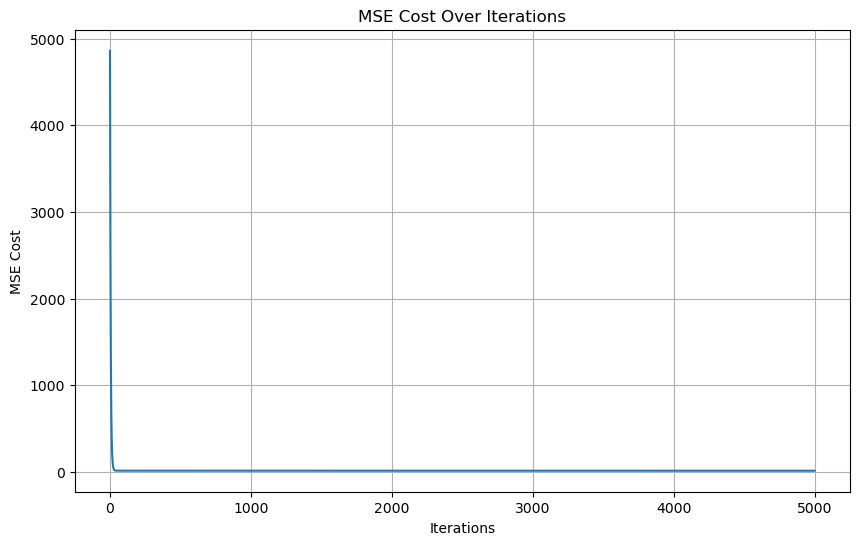

MAE COST: 2.71


array([ 6.92902553e+01, -2.26402410e+00,  8.18426635e+00,  1.82311439e-01,
        2.32558718e-01, -1.42835335e-01, -2.35406513e-01,  5.81353257e-01,
       -8.28873156e+00,  5.60172544e-01,  8.13643666e-02,  7.13246240e-01,
       -2.56324643e+00,  5.42429028e-01, -7.63991174e-02, -3.56549077e-01,
       -2.73814597e-02,  1.60235331e+00,  2.63438787e+00])

In [71]:
# Call the function
# Change X_train and y_train back to dataframes
X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

linear_regression(X_train, y_train, X_test, y_test, 0.05, 5000)